In [3]:
import shutil

# specify the file path of the zip file
file_path = "image.zip"

# specify the directory where you want to extract the files
extract_path = "./"

# unzip the file
shutil.unpack_archive(file_path, extract_path)


In [1]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout, BatchNormalization

In [2]:
from tensorflow.keras.preprocessing import image

In [8]:
print(tf.__version__)

2.9.2


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [4]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [5]:
data = pd.read_csv('data_final1.csv')
data.shape

(500, 27)

In [6]:
lebar = 350
tinggi = 350

x = []

for i in tqdm(range(data.shape[0])):
  path = './image1/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(lebar, tinggi, 3))
  img = image.img_to_array(img)
  img = img/255.0
  x.append(img)

x = np.asarray(x)

100%|██████████| 500/500 [00:03<00:00, 131.14it/s]


In [7]:
x.shape

(500, 350, 350, 3)

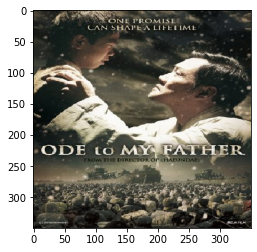

In [8]:
plt.imshow(x[1])

In [9]:
data['Genre'][1]

"['Drama', 'Romance', 'War']"

In [10]:
data2 = pd.read_csv('data_final1.csv')

In [11]:
cols_to_keep = ['Id','Genre','Action','Adventure','Drama','Animation','Documentary']
data2.drop(columns=[col for col in data2.columns if col not in cols_to_keep], inplace=True)

In [12]:
data2

,Id,Genre,Action,Adventure,Animation,Documentary,Drama
0,tt2398231,"['Drama', 'Western']",0,0,0,0,1
1,tt3812366,"['Drama', 'Romance', 'War']",0,0,0,0,1
2,tt2639344,['Drama'],0,0,0,0,1
3,tt2372678,"['Comedy', 'Drama', 'Romance']",0,0,0,0,1
4,tt3099498,"['Comedy', 'Drama', 'Horror']",0,0,0,0,1
...,...,...,...,...,...,...,...
495,tt3110272,"['Documentary', 'Adventure', 'Biography']",0,1,0,1,0
496,tt2933292,"['Documentary', 'Adventure', 'Family']",0,1,0,1,0
497,tt1291150,"['Action', 'Adventure', 'Comedy']",1,1,0,0,0
498,tt3950078,['Adventure'],0,1,0,0,0


In [13]:
y = data2.drop(['Id','Genre'], axis=1)
y = np.asarray(y)
y.shape

(500, 5)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.15)

In [15]:
x_train[0].shape

(350, 350, 3)

## Buat Model CNN

In [16]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 348, 348, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 174, 174, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 174, 174, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 172, 172, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 172, 172, 32)     1

In [23]:
history = model.fit(x_train, y_train, batch_size=10, epochs=80, validation_data=(x_test, y_test))

Epoch 1/80
43/43 [==============================] - 45s 1s/step - loss: 0.2976 - accuracy: 0.5600 - val_loss: 0.6652 - val_accuracy: 0.2533
Epoch 2/80
43/43 [==============================] - 44s 1s/step - loss: 0.3772 - accuracy: 0.5459 - val_loss: 1.0111 - val_accuracy: 0.2400
Epoch 3/80
43/43 [==============================] - 45s 1s/step - loss: 0.3488 - accuracy: 0.5647 - val_loss: 0.5812 - val_accuracy: 0.3600
Epoch 4/80
43/43 [==============================] - 45s 1s/step - loss: 0.3984 - accuracy: 0.5318 - val_loss: 2.0220 - val_accuracy: 0.2400
Epoch 5/80
43/43 [==============================] - 46s 1s/step - loss: 0.3184 - accuracy: 0.5553 - val_loss: 0.8581 - val_accuracy: 0.2533
Epoch 6/80
43/43 [==============================] - 47s 1s/step - loss: 0.3469 - accuracy: 0.5247 - val_loss: 0.5862 - val_accuracy: 0.3200
Epoch 7/80
43/43 [==============================] - 47s 1s/step - loss: 0.3363 - accuracy: 0.5718 - val_loss: 0.5713 - val_accuracy: 0.2933
Epoch 8/80
43/43 [==

43/43 [==============================] - 46s 1s/step - loss: 0.1810 - accuracy: 0.6824 - val_loss: 0.5472 - val_accuracy: 0.3200
Epoch 60/80
43/43 [==============================] - 46s 1s/step - loss: 0.1623 - accuracy: 0.6518 - val_loss: 0.5468 - val_accuracy: 0.3467
Epoch 61/80
43/43 [==============================] - 46s 1s/step - loss: 0.1541 - accuracy: 0.6776 - val_loss: 0.5822 - val_accuracy: 0.3067
Epoch 62/80
43/43 [==============================] - 47s 1s/step - loss: 0.1804 - accuracy: 0.6776 - val_loss: 0.5474 - val_accuracy: 0.3867
Epoch 63/80
43/43 [==============================] - 47s 1s/step - loss: 0.1770 - accuracy: 0.6471 - val_loss: 0.5385 - val_accuracy: 0.3333
Epoch 64/80
43/43 [==============================] - 47s 1s/step - loss: 0.1573 - accuracy: 0.6612 - val_loss: 0.5128 - val_accuracy: 0.4133
Epoch 65/80
43/43 [==============================] - 47s 1s/step - loss: 0.1513 - accuracy: 0.6753 - val_loss: 0.5179 - val_accuracy: 0.4000
Epoch 66/80
43/43 [======

In [24]:
def plot_learningCurve(history, epoch):
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

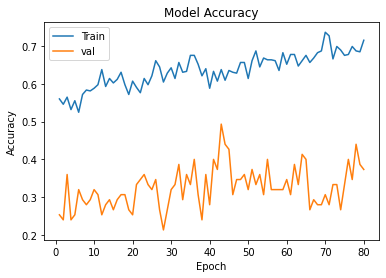

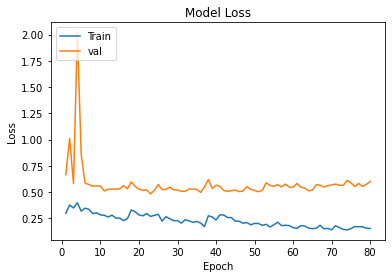

In [25]:
plot_learningCurve(history, 80)

In [26]:
img = image.load_img('./image/tt1291150.jpg', target_size=(lebar, tinggi, 3))
plt.show(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, lebar, tinggi, 3)

classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)
genre = np.argmax(y_prob)

print(classes[genre])

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
1/1 [==============================] - 0s 51ms/step
Adventure


In [27]:
model.save_weights('fungsi3_3(terr).h5')